# Locale sensitive tick labels with Matplotlib

## Background

In [1]:
import locale
# loc = input("Locale: ")
loc = "fr_FR.UTF-8"
locale.setlocale(locale.LC_ALL, loc)
print(loc)
for key, value in locale.localeconv().items():
    print("%s: %s" % (key, value))

fr_FR.UTF-8
int_curr_symbol: EUR 
currency_symbol: €
mon_decimal_point: ,
mon_thousands_sep:  
mon_grouping: [3, 0]
positive_sign: 
negative_sign: -
int_frac_digits: 2
frac_digits: 2
p_cs_precedes: 0
p_sep_by_space: 1
n_cs_precedes: 0
n_sep_by_space: 1
p_sign_posn: 1
n_sign_posn: 1
decimal_point: ,
thousands_sep:  
grouping: [3, 0]


The following table identifies `fr_FR.UTF-8` locale properties on Ubunto 22.04 and macOS 12.3.1.

|Property  |Ubuntu 22.04 LTS  |macOS  |
|--------- |----------------- |------ |
|int_curr_symbol  |EUR   |EUR  |
|currency_symbol  |€  |Eu  |
|mon_decimal_point  |,  |,  |
|mon_thousands_sep  |U+202F  |U+0020  |
|mon_grouping  |[3, 0]  |[3, 3, 0]  |
|positive_sign  |  |  |
|negative_sign  |-  |-  |
|int_frac_digits  |2  |2  |
|frac_digits  |2  |2  |
|p_cs_precedes  |0  |0  |
|p_sep_by_space  |1  |1  |
|n_cs_precedes  |0  |0  |
|n_sep_by_space  |1  |1  |
|p_sign_posn  |1  |1  |
|n_sign_posn  |1  | 2  |
|decimal_point  |,  |,  |
|thousands_sep  |U+202F  |  |
|grouping  |[3, 0]  |[127]  |

As can be seen, each OS has a different grouping (thousands) seperator. This means that locale formatted numbers, and consequently locale formatted numeric tick labels in Matplotlib, will differ between the two operating systems.

Ubuntu will use U+202F (NARROW NON-BREAKING SPACE) as the grouping (thousands) seperator while macOS will not use a groupng seperator. Both platforms use a comma for the decimal seperator.

## Using locale formated tick labels

The function [matplotlib.axes.Axes.ticklabel_format(useLocale=True)](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html) can be used to enable locale formatted numbers for all the axes of a plot.

Alternatively, [matplotlib.pyplot.ticklabel_format](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ticklabel_format.html) could be used.

It can also be set globally via `rcParams`, i.e. 

```py
import matplotlib as mpl
mpl.rcParams["axes.formatter.use_locale"] = True
```

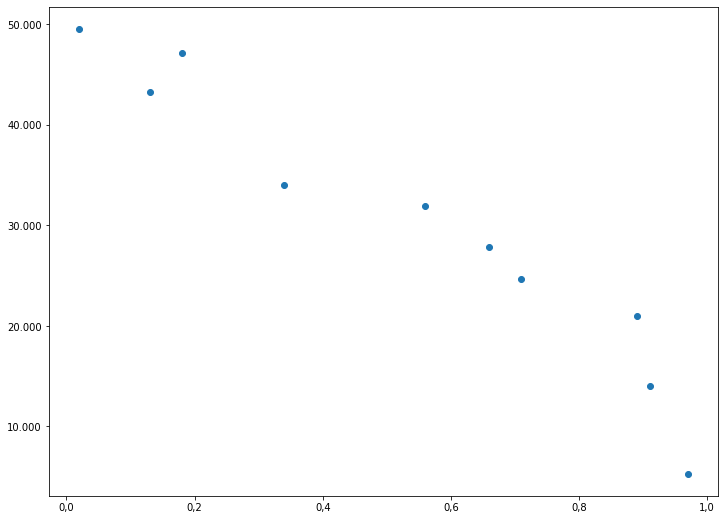

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
locale.setlocale(locale.LC_NUMERIC, "de_DE.UTF-8")

# Fixing random state for reproducibility
np.random.seed(19680801)

x = [0.02, 0.13, 0.18, 0.34, 0.56, 0.66, 0.71, 0.89, 0.91, 0.97]
y = [49540, 43298, 47098, 34020, 31900, 27890, 24674, 21000, 14000, 5320]


fig, ax = plt.subplots(figsize=(12,9))
ax.ticklabel_format(useLocale=True)
ax = plt.scatter(x, y)
plt.show()

|Ubuntu  |macOS  |
|------  |------ |
|<img style="background-color:white;" alt="Ubuntu plot" src="img/linux1.png" />  |<img style="background-color:white;" alt="macOS plot" src="img/macos1.png" />  |


As can be seen above the plot generated on Ubuntu uses a goruping (thousands) seperator on the Y-axis, and a comma as a decimal seperator on the X-Axis. The macOS plot generated by the same code has no grouping seperator on Y-axis, and uses a comma as the decimal seperator on the X-axis.

## Per-axis formating of tick labels

Alternatively, the use of locale formatting can be set per axis in a plot utilising [matplotlib.ticker.ScalarFormatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.ScalarFormatter) or [matplotlib.pyplot.ticklabel_format](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ticklabel_format.html).

In the example below we disable both offset notation and scientific notation, to allow us to more clearly demonstrate locale numeric formatting in a plot, and retain consistency with the previous plot

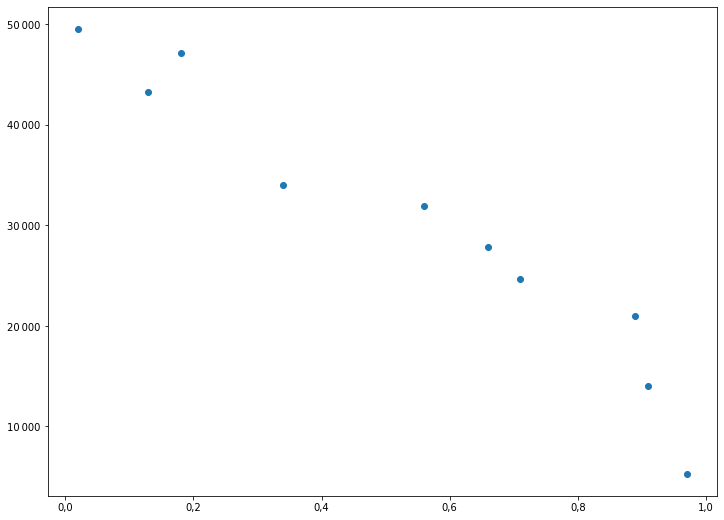

In [3]:
locale._override_localeconv = {'thousands_sep': "\u202F"}
fig2, ax2 = plt.subplots(figsize=(12,9))
formatter = ticker.ScalarFormatter(useOffset=False, useLocale=True)
formatter.set_scientific(False)
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2 = plt.scatter(x, y)
plt.show()